# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*


## Spatial Cross-Validation 

Tasks: 

1. ...

2. ...

3. ... 

In [18]:
# spatial k-fold package 
# !pip install spatial-kfold

In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from spatialkfold.blocks import spatial_blocks 
from spatialkfold.datasets import load_ames
from spatialkfold.clusters import spatial_kfold_clusters 
from spatialkfold.plotting import spatial_kfold_plot
from spatialkfold.stats import spatial_kfold_stats

In [3]:
# Load ames data
ames = load_ames()
ames_prj = ames.copy().to_crs(ames.estimate_utm_crs())
ames_prj['id'] = range(len(ames_prj))

In [4]:
ames_prj.crs

In [5]:
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,geometry
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,POINT (-93.61975 42.05403)
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,POINT (-93.61976 42.05301)
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,POINT (-93.61939 42.05266)
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,POINT (-93.61732 42.05125)
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,POINT (-93.63893 42.06090)


<Axes: >

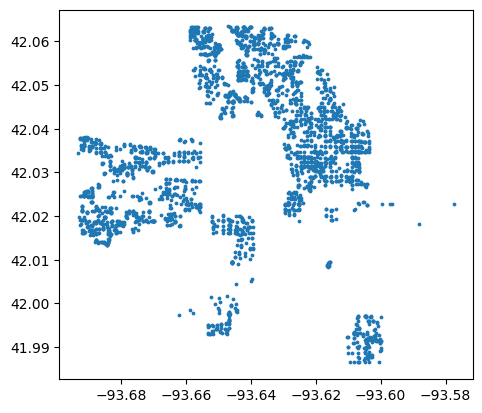

In [23]:
ames.plot(markersize=3)

## 1. Spatial clustering with KMeans

In [24]:
# 1. Spatial cluster resampling 
ames_clusters = spatial_kfold_clusters(gdf=ames_prj, name='id', nfolds=10, 
                                       algorithm='kmeans', random_state=569) 


/Users/lukas/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# ames_clusters.head()

In [26]:
# Get the 'tab20' colormap
cols_tab = cm.get_cmap('tab20', 10)
# Generate a list of colors from the colormap
cols = [cols_tab(i) for i in range(10)]
# create a color ramp
color_ramp = ListedColormap(cols)

/var/folders/51/76h6b4vd7s99rjzbn4t681_h0000gp/T/ipykernel_74123/3378962096.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cols_tab = cm.get_cmap('tab20', 10)


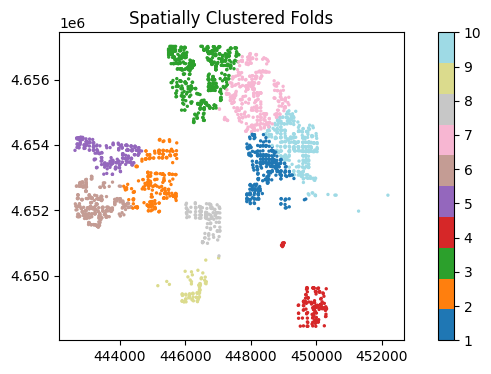

In [27]:
# Plot 
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 
ames_clusters.plot(column='folds', ax=ax, cmap= color_ramp, markersize = 2, legend=True)
ax.set_title('Spatially Clustered Folds')
plt.show()

In [28]:
# check the number of train and test of the dependent variable for each fold
ames_clusters_stats = spatial_kfold_stats(X=ames_clusters, y= ames_clusters.Sale_Price, 
                                          groups = ames_clusters.folds)

In [29]:
ames_clusters_stats

,split,train,test
0,1,2594,336
1,2,2687,243
2,3,2270,660
3,4,2769,161
4,5,2694,236
5,6,2606,324
6,7,2537,393
7,8,2790,140
8,9,2857,73
9,10,2566,364


## 2. Spatial Blocks

### 2.1 spatial resampled random blocks  

In [30]:
# create 10 random blocks 
ames_rnd_blocks = spatial_blocks(gdf=ames_prj, width=1500, height=1500, 
                                 method='random', nfolds=10, 
                                 random_state=135)

In [31]:
ames_rnd_blocks.head()

,geometry,folds
23,"POLYGON ((451625.546 4648453.370, 451625.546 4...",1
2,"POLYGON ((445625.546 4648453.370, 445625.546 4...",1
25,"POLYGON ((453125.546 4651453.370, 453125.546 4...",1
1,"POLYGON ((444125.546 4652953.370, 444125.546 4...",2
0,"POLYGON ((444125.546 4651453.370, 444125.546 4...",2


Text(0.5, 1.0, 'Random Blocks Folds')

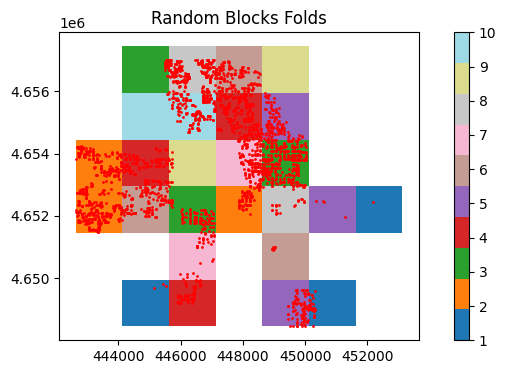

In [32]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_rnd_blocks.plot(column = 'folds',cmap = color_ramp, ax = ax ,lw=0.7, legend = True)
ames_prj.plot(ax=ax,  markersize = 1, color = 'r')
ax.set_title('Random Blocks Folds')

In [33]:
# Resample the ames data with the prepared blocks 

In [34]:
ames_res_rnd_blk = gpd.overlay(ames_prj, ames_rnd_blocks)

In [35]:
ames_res_rnd_blk.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,id,folds,geometry
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,None,0,5,2010,WD,Normal,215000,0,9,POINT (448716.789 4655961.485)
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,None,0,6,2010,WD,Normal,105000,1,5,POINT (448715.802 4655848.124)
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,Gar2,12500,6,2010,WD,Normal,172000,2,5,POINT (448746.026 4655808.487)
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,None,0,4,2010,WD,Normal,244000,3,5,POINT (448915.962 4655650.253)
4,Split_Foyer,Residential_Low_Density,75.0,11380,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Shed,1500,1,2010,WD,Normal,178000,134,5,POINT (448839.195 4655345.347)


Text(0.5, 1.0, 'Spatially Resampled\nRandom Blocks')

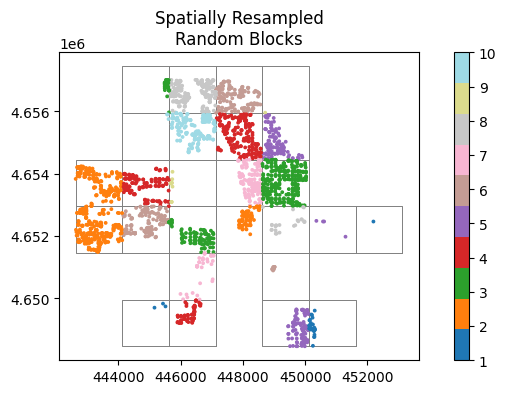

In [36]:
# plot the resampled blocks
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_rnd_blocks.plot(facecolor="none",edgecolor='grey', ax = ax ,lw=0.7)
ames_res_rnd_blk.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 3)
ax.set_title('Spatially Resampled\nRandom Blocks')

In [37]:

ames_res_rnd_blk_stats = spatial_kfold_stats(X=ames_res_rnd_blk, y= ames_res_rnd_blk.Sale_Price, 
                                             groups = ames_res_rnd_blk.folds)


In [38]:
ames_res_rnd_blk_stats

,split,train,test
0,1,2893,37
1,2,2371,559
2,3,2414,516
3,4,2472,458
4,5,2687,243
5,6,2608,322
6,7,2720,210
7,8,2589,341
8,9,2920,10
9,10,2696,234


### 2.2 Continuous spatial resampled blocks
Two option are availble with orientation :

'tb-lr' : top-bottom, left-right

'bt-rl' : bottom-top, right-left

In [39]:
ames_cont_blocks = spatial_blocks(gdf=ames_prj, width=1500, height=1500, 
                                  method='continuous', orientation='tb-lr' ,
                                  nfolds=10, random_state= 135)

Text(0.5, 1.0, 'Continuous Blocks Folds\norientation:"tb-lr"')

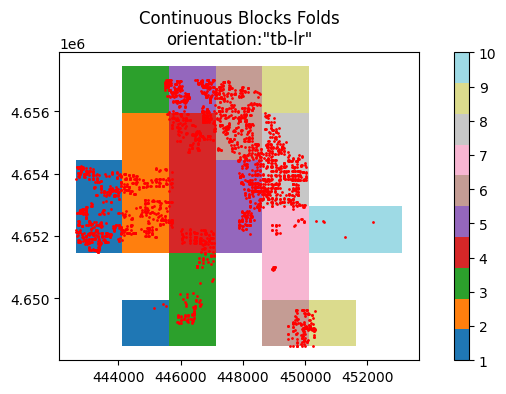

In [40]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_cont_blocks.plot(column = 'folds',cmap = color_ramp, ax = ax ,lw=0.7, legend = True)
ames_prj.plot(ax=ax,  markersize = 1, color = 'r')
ax.set_title('Continuous Blocks Folds\norientation:"tb-lr"')

In [41]:
# resample the ames data with the prepared blocks 
ames_res_cont_blk = gpd.overlay (ames_prj, ames_cont_blocks)

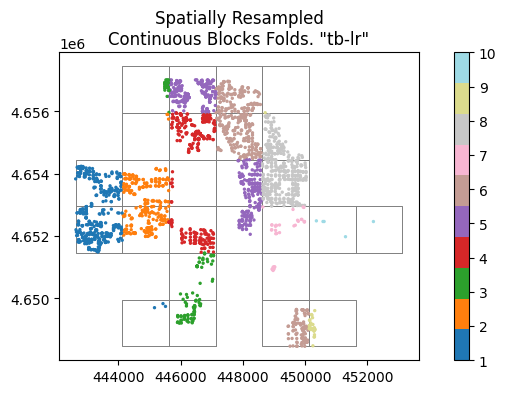

In [42]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_cont_blocks.plot(facecolor="none",edgecolor='grey', ax = ax ,lw=0.7)
ames_res_cont_blk.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 2)
ax.set_title('Spatially Resampled\nContinuous Blocks Folds. "tb-lr"')
plt.show()

In [43]:
ames_res_cont_blk_stats = spatial_kfold_stats(X=ames_res_cont_blk, y= ames_res_cont_blk.Sale_Price, 
                                              groups = ames_res_cont_blk.folds)

In [44]:
ames_res_cont_blk_stats

,split,train,test
0,1,2446,484
1,2,2628,302
2,3,2801,129
3,4,2567,363
4,5,2367,563
5,6,2402,528
6,7,2894,36
7,8,2444,486
8,9,2896,34
9,10,2925,5


## 3. Plotting function
Plot the partitioning of the data at each fold

In [47]:
# check the folds number 
np.unique(ames_clusters.folds.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

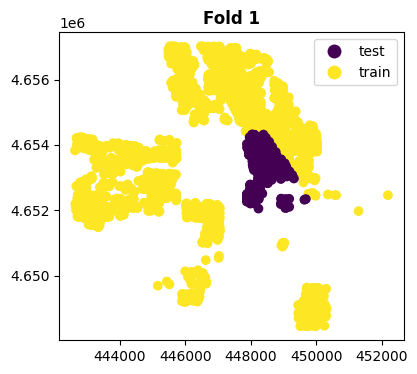

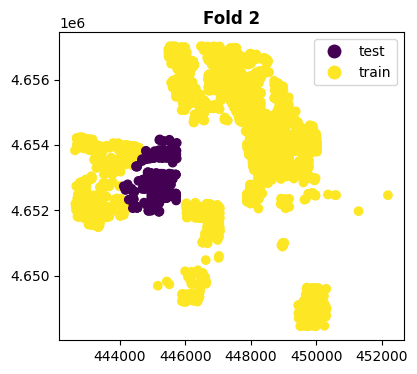

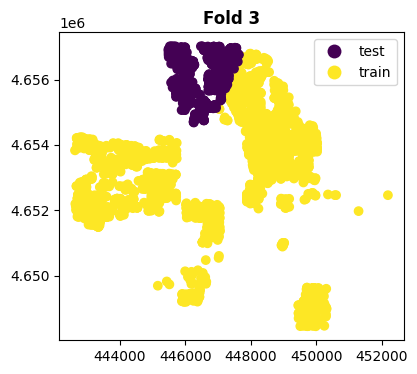

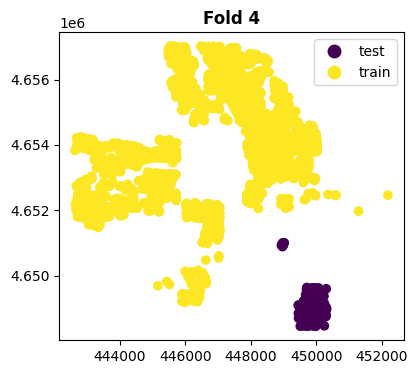

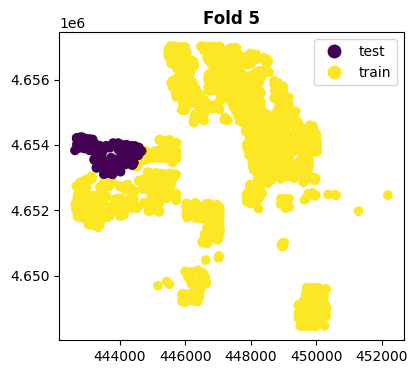

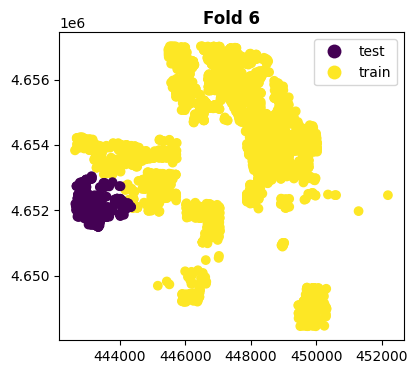

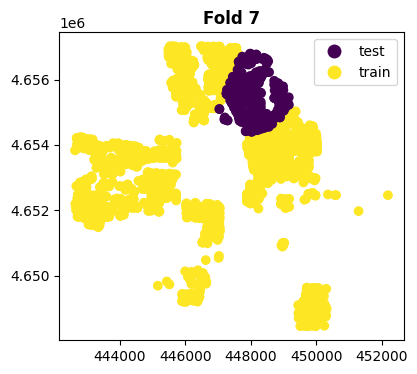

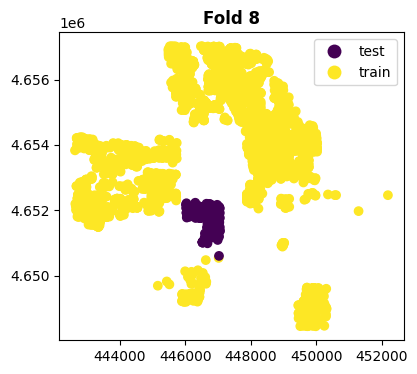

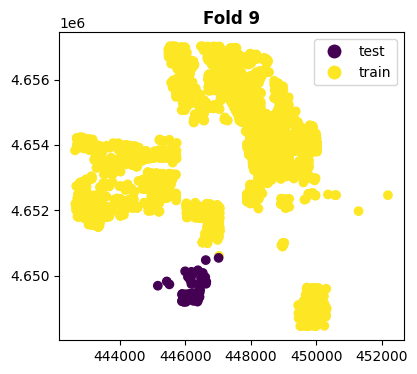

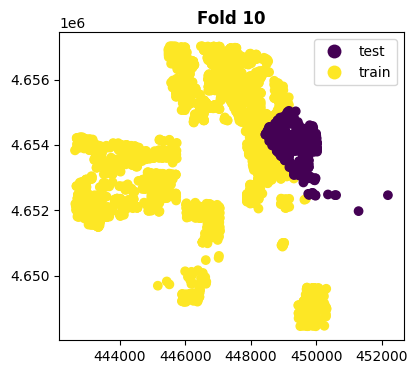

In [48]:
for i in range(1,11):
    fig, ax = plt.subplots(1,1 , figsize=(9, 4))

    spatial_kfold_plot(X=ames_clusters, 
                       geometry=ames_clusters.geometry, 
                       groups=ames_clusters.folds, 
                       fold_num=i, cmap='viridis', ax=ax)